
**5.7.2 : Text generation using Bidirectional LSTM (Tensorflow Keras)**



In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np

### **Load and preprocess data**

In [2]:
tokenizer = Tokenizer()
data = open('Data/Sleeping_beauty.txt').read()
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [3]:
total_words

2201

### **Create input sequences using list of tokens**

Convert each line of text into a sequence of tokens and create n-gram sequences for training.

In [4]:
 #create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

Pad the sequences to ensure they all have the same length, which is required for training the model.

In [5]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

### **Create predictors and label**

Split the input sequences into predictors and labels. Convert the labels to categorical format.

In [6]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

### **Build the model**

Build the neural network model using Keras. The model includes an embedding layer, bidirectional LSTM layers, dropout layers, and dense layers with regularization.

In [8]:
# Define the input layer
inputs = Input(shape=(max_sequence_len-1,))

# Add the embedding layer
x = Embedding(total_words, 100)(inputs)

# Add the Bidirectional LSTM layer
x = Bidirectional(LSTM(150, return_sequences=True))(x)

# Add the Dropout layer
x = Dropout(0.2)(x)

# Add another LSTM layer
x = LSTM(100)(x)

# Add the Dense layer with regularization
x = Dense(total_words//2, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)

# Add the output Dense layer
outputs = Dense(total_words, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 16, 100)        │       220,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 16, 300)        │       301,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 300)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1100)           │       111,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2201)           │     2,423,301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,216,101 (12.27 MB)

 Trainable params: 3,216,101 (12.27 MB)

 Non-trainable params: 0 (0.00 B)

None


### **Train the model**

Train the model on the prepared data for 100 epochs

In [9]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.0802 - loss: 6.9726
Epoch 2/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.0809 - loss: 5.8963
Epoch 3/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.0883 - loss: 5.6520
Epoch 4/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.0843 - loss: 5.5898
Epoch 5/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.0932 - loss: 5.4842
Epoch 6/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.1030 - loss: 5.4105
Epoch 7/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.1085 - loss: 5.3345
Epoch 8/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.1224 - loss: 5.2113
Epoch 9/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.1336 - loss: 5.1545
Epoch 10/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.1436 - loss: 5.0161
Epoch 11/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.1464 - loss: 5.0004
Epoch 12/100
328/328 ━━━━━━━━━

### **Plotting training accuracy and loss**

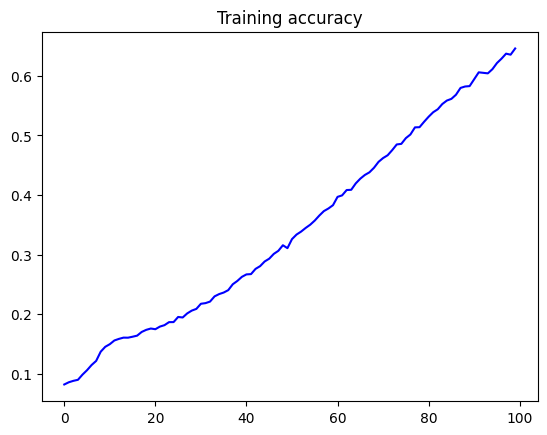

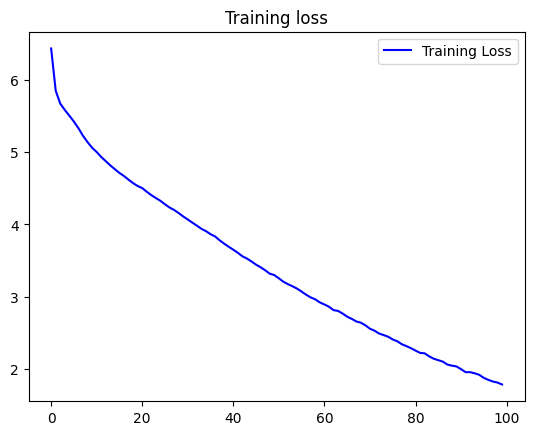

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()


In [23]:
seed_text = "There was once a sweet prince"
next_words = 100

### **Generate text**

Generate new text based on a seed text using the trained model. Insert a newline character after every 10 words for better readability

In [24]:
words_per_line = 10  # Number of words after which to insert a newline
word_count = 0

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    
    predict_x = model.predict(token_list, verbose=0)
    predicted = np.argmax(predict_x, axis=1)[0]  # Extract the single value from the array
    
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    
    seed_text += " " + output_word
    word_count += 1
    
    if word_count % words_per_line == 0:
        seed_text += "\n"

print(seed_text)

There was once a sweet prince higher all the paths the roads were thinking of it
 that he threw open the queen's chamber the prince saw
 her arms the prince began to bark at the garden
 leapt up for indeed the prince who had tried to
 easily as he touched her face is the end of
 the water perched of the rafters with them all that
 he hastened back and he went as though a window
 in the water lily leaves now her daughter the rays
 of the water perched of the eaves next day that
 he hastened back and he did not myself think for

